<img src = "https://imgur.com/HE0kDhA.jpg"  align = "center">

# **Overfitting Handling** 
**Bagian A :** Variation of Overfitting and Underfitting Handling Techniques #3
* Data Augmentation

Di modul sebelumnya, kita sudah belajar beberapa cara untuk menangani kondisi overfit. Akan tetapi, kondisi tersebut tidak bisa sepenuhnya terselesaikan. Ada beberapa alasan yang mnyebabkan hal tersebut, diantaranya karena arsitektur model yang kurang tepat, atau jumlah dataset yang terlampau sedikit. Alasan nomor 2 ini yang seringkali terjadi. Dimana kita hanya memiliki jumlah data yang terlampau sedikit untuk bisa dipelajari oleh arsitektur deep learning. Padahal, agar model yang terbentuk bisa memiliki nilai akurasi dan error yang baik, model perlu untuk belajar lebih banyak data. Semakin banyak data yang dapat digunakan untuk belajar, maka diharapkan model yang terbentuk akan semakin baik. Untuk mengatasi masalah ini, kita bisa menggunakan teknik 'augmentation'.

### **Data Augmentation**

Pada dasarnya, data augmentation adalah teknik memperbanyak data dengan cara menduplikasi serta memanipulasi nilai dari data tersebut. Pada image classification, teknik augmentasi dilakukan dengan cara menduplikasi suatu image, kemudian melakukan rotasi, resizing, ataupun teknik manipulasi lain pada image hasil duplikasi tersebut. Dengan cara seperti ini, satu buah image bisa diduplikasi menjadi beberapa buah image. Sehingga dataset akan menjadi semakin banyak, seperti yang dapat dilihat pada gambar berikut:

![alt text](https://i.imgur.com/mSTmqUv.png)

Gambar di sebelah kiri adalah image asli. Sedangkan 8 image yang ada di sebelah kanan adalah hasil augmentasi dari image tersebut. Dapat dilihat bahwa image asli diduplikasi menjadi 8 buah, kemudian dilakukan teknik manipulasi seperti translasi, rotasi, resize, zoom in, zoom out, dan lain-lain agar satu image dengan image yang lain menjadi tampak berbeda.

Dari beberapa penelitian yang dilakukan, image augmentation terbukti dapat meningkatkan akurasi dari model yang dihasilkan, sekaligus menekan kondisi overfitting



---



---



## **Implementasi**

### **Load Dataset**

In [ ]:
# Download dataset
!wget --no-check-certificate \
    https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip \
    -O /tmp/cats_and_dogs_filtered.zip

--2020-07-29 03:31:40--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.20.128, 74.125.28.128, 74.125.142.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.20.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘/tmp/cats_and_dogs_filtered.zip’

/tmp/cats_and_dogs_ 100%[===================>]  65.43M   139MB/s    in 0.5s    

2020-07-29 03:31:41 (139 MB/s) - ‘/tmp/cats_and_dogs_filtered.zip’ saved [68606236/68606236]



In [ ]:
# Ekstrak dataset

import os
import zipfile

local_zip = '/tmp/cats_and_dogs_filtered.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

In [ ]:
# Definisikan path untuk data train dan data validation

base_dir = '/tmp/cats_and_dogs_filtered'

train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

In [ ]:
import cv2
import numpy as np

# Gather data train
train_data = []
train_label = []
for r, d, f in os.walk(train_dir):
    for file in f:
        if ".jpg" in file:
            imagePath = os.path.join(r, file)
            image = cv2.imread(imagePath)
            image = cv2.resize(image, (150,150))
            train_data.append(image)
            label = imagePath.split(os.path.sep)[-2]
            train_label.append(label)

train_data = np.array(train_data)
train_label = np.array(train_label)

In [ ]:
# Gather data validation
val_data = []
val_label = []
for r, d, f in os.walk(validation_dir):
    for file in f:
        if ".jpg" in file:
            imagePath = os.path.join(r, file)
            image = cv2.imread(imagePath)
            image = cv2.resize(image, (150,150))
            val_data.append(image)
            label = imagePath.split(os.path.sep)[-2]
            val_label.append(label)

val_data = np.array(val_data)
val_label = np.array(val_label)

### **Data Preprocessing**

In [ ]:
# Tampilkan shape dari data train dan data validation
print("Train Data = ", train_data.shape)
print("Train Label = ", train_label.shape)
print("Validation Data = ", val_data.shape)
print("Validation Label = ", val_label.shape)

Train Data =  (2000, 150, 150, 3)
Train Label =  (2000,)
Validation Data =  (1000, 150, 150, 3)
Validation Label =  (1000,)


In [ ]:
# Normalisasi dataset
print("Data sebelum di-normalisasi ", train_data[0][0][0])

x_train = train_data.astype('float32') / 255.0
x_val = val_data.astype('float32') / 255.0
print("Data setelah di-normalisasi ", x_train[0][0][0])

Data sebelum di-normalisasi  [ 58 142 208]
Data setelah di-normalisasi  [0.22745098 0.5568628  0.8156863 ]


In [ ]:
# Transformasi label encoder
from sklearn.preprocessing import LabelEncoder

print("Label sebelum di-encoder ", train_label[995:1005])

lb = LabelEncoder()
y_train = lb.fit_transform(train_label)
y_val = lb.fit_transform(val_label)

print("Label setelah di-encoder ", y_train[995:1005])

Label sebelum di-encoder  ['cats' 'cats' 'cats' 'cats' 'cats' 'dogs' 'dogs' 'dogs' 'dogs' 'dogs']
Label setelah di-encoder  [0 0 0 0 0 1 1 1 1 1]


### **Menerapkan Data Augmentation**

Untuk melakukan image augmentation, kita perlu memanggil fungsi ImageDataGenerator. Kemudian, kita lakukan duplikasi dan manipulasi untuk tiap image yang ada pada dataset. Manipulasi yang kita lakukan pada praktikum kali ini ialah:
1.   Rotasi image +-30 derajat secara random
2.   Geser image secara horizontal dan vertikal dengan faktor 0.1
3.   Potong image sebesar 0.2
4.   Perbesar dengan pengambilan sampel secara seragam dalam kisaran [0,8, 1,2]
5.   Flip (balik) secara horizontal

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
aug = ImageDataGenerator(rotation_range=30, width_shift_range=0.1,
                        height_shift_range=0.1, shear_range=0.2, 
                        zoom_range=0.8, horizontal_flip=True,
                        fill_mode="nearest")

### **Mendefinisikan Model dengan Data Augmentation**

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer, Dense, Conv2D, MaxPool2D, Flatten, BatchNormalization, Dropout

In [ ]:
# Feature Extraction Layer
model = Sequential()

model.add(InputLayer(input_shape=[150,150,3]))
model.add(Conv2D(filters=16, kernel_size=3, strides=1, padding='same', activation='elu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=2, padding='same'))
model.add(Conv2D(filters=32, kernel_size=3, strides=1, padding='same', activation='elu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=2, padding='same'))
model.add(Conv2D(filters=64, kernel_size=3, strides=1, padding='same', activation='elu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=2, padding='same'))
model.add(Dropout(0.25))
model.add(Flatten())

# Fully Connected Layer
model.add(Dense(128, activation='elu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

# Compile model
from tensorflow.keras.optimizers import SGD

model.compile(optimizer=SGD(lr=0.001, decay=0.001/20), # decay = learning_rate / batch_size 
              loss='binary_crossentropy', 
              metrics=['acc'])

In [ ]:
H = model.fit_generator(aug.flow(x_train, y_train, batch_size=20), verbose=1,
                        validation_data=(x_val, y_val), epochs=15)

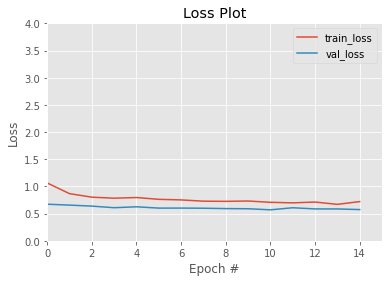

In [ ]:
%matplotlib inline

import matplotlib.pyplot as plt

plt.style.use("ggplot")
plt.figure()
plt.axis([0, 15, 0, 4])
plt.plot(np.arange(0, 15), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, 15), H.history["val_loss"], label="val_loss")
plt.title("Loss Plot")
plt.xlabel("Epoch #")
plt.ylabel("Loss")
plt.legend()
plt.show()

Dari grafik loss di atas, terlihat generalization gap antara train loss dan validation loss menyempit. Akan tetapi, model ini masih kurang baik karena penurunan nilai loss di tiap epoch masih terlalu kecil. Hal ini diakibatkan nilai learning rate yang terlalu kecil. Coba lakukan percobaan dengan memperbesar nilai learning rate agar penurunan nilai loss tidak terlalu landai.

# **Overfitting Handling** 
**Bagian A :** Variation of Overfitting and Underfitting Handling Techniques #4
* Transfer Learning

Di modul-modul sebelumnya, kita sudah belajar bagaimana cara membuat arsitektur CNN dari awal (*from scratch*). Membuat arsitektur sendiri memang lebih fleksibel. Kita dapat menambah dan mengurangi layer semau kita. Akan tetapi, membuat arsitektur sendiri kadangkala juga merepotkan. Karena kita harus mengatur (melakukan tuning) terhadap begitu banyak parameter. Ada cara yang lebih baik dalam membuat model deep learning menggunakan metode CNN, yakni dengan memanfaatkan model yang telah dibuat oleh peneliti sebelumnya. Model-model ini terbukti mampu menghasilkan nilai akurasi dan nilai error yang baik, serta menduduki peringkat atas di beberapa kompetisi. Beberapa model sudah disediakan oleh library Keras, dan kita hanya tinggal menggunakannya. Proses menggunakan kembali model yang sudah ada, untuk dipasang di dataset yang berbeda, dikenal dengan istilah **Transfer Learning**






---



---



# Langkah Praktikum

<h3>Load Dataset</h3>

In [ ]:
# Download dataset
!wget --no-check-certificate \
    https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip \
    -O /tmp/cats_and_dogs_filtered.zip

--2021-09-06 07:35:08--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.142.128, 74.125.195.128, 2607:f8b0:400e:c08::80, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.142.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘/tmp/cats_and_dogs_filtered.zip’

/tmp/cats_and_dogs_ 100%[===================>]  65.43M  90.8MB/s    in 0.7s    

2021-09-06 07:35:09 (90.8 MB/s) - ‘/tmp/cats_and_dogs_filtered.zip’ saved [68606236/68606236]



In [ ]:
# Ekstrak dataset

import os
import zipfile

local_zip = '/tmp/cats_and_dogs_filtered.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

In [ ]:
# Definisikan path untuk data train dan data validation

base_dir = '/tmp/cats_and_dogs_filtered'

train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

Karena model yang nantinya kita gunakan cukup kompleks, maka untuk mempersingkat waktu training, kita akan mengecilkan ukuran image yang ada di dataset menjadi 50 x 50

In [ ]:
import cv2
import numpy as np

# Gather data train
train_data = []
train_label = []
for r, d, f in os.walk(train_dir):
    for file in f:
        if ".jpg" in file:
            imagePath = os.path.join(r, file)
            image = cv2.imread(imagePath)
            image = cv2.resize(image, (50,50))
            train_data.append(image)
            label = imagePath.split(os.path.sep)[-2]
            train_label.append(label)

train_data = np.array(train_data)
train_label = np.array(train_label)

In [ ]:
# Gather data validation
val_data = []
val_label = []
for r, d, f in os.walk(validation_dir):
    for file in f:
        if ".jpg" in file:
            imagePath = os.path.join(r, file)
            image = cv2.imread(imagePath)
            image = cv2.resize(image, (50,50))
            val_data.append(image)
            label = imagePath.split(os.path.sep)[-2]
            val_label.append(label)

val_data = np.array(val_data)
val_label = np.array(val_label)

<h3>Data Preprocessing</h3>

In [ ]:
# Tampilkan shape dari data train dan data validation
print("Train Data = ", train_data.shape)
print("Train Label = ", train_label.shape)
print("Validation Data = ", val_data.shape)
print("Validation Label = ", val_label.shape)

Train Data =  (2000, 50, 50, 3)
Train Label =  (2000,)
Validation Data =  (1000, 50, 50, 3)
Validation Label =  (1000,)


In [ ]:
# Normalisasi dataset
print("Data sebelum di-normalisasi ", train_data[0][0][0])

x_train = train_data.astype('float32') / 255.0
x_val = val_data.astype('float32') / 255.0
print("Data setelah di-normalisasi ", x_train[0][0][0])

Data sebelum di-normalisasi  [255 255 255]
Data setelah di-normalisasi  [1. 1. 1.]


In [ ]:
# Transformasi label encoder
from sklearn.preprocessing import LabelEncoder

print("Label sebelum di-encoder ", train_label[995:1005])

lb = LabelEncoder()
y_train = lb.fit_transform(train_label)
y_val = lb.fit_transform(val_label)

print("Label setelah di-encoder ", y_train[995:1005])

Label sebelum di-encoder  ['cats' 'cats' 'cats' 'cats' 'cats' 'dogs' 'dogs' 'dogs' 'dogs' 'dogs']
Label setelah di-encoder  [0 0 0 0 0 1 1 1 1 1]


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
aug = ImageDataGenerator(rotation_range=30, width_shift_range=0.1,
                        height_shift_range=0.1, shear_range=0.2, 
                        zoom_range=0.8, horizontal_flip=True,
                        fill_mode="nearest")

<h3>Definisikan Model</h3>

Dalam transfer learning, ada beberapa teknik yang bisa digunakan. Diantaranya:
*   *Direct Used* (Langsung menggunakan model dan bobot yang ada)
*   *Network Surgery* (Menggunakan arsitektur dan bobot yang sama untuk Feature Extracted Layer, akan tetapi membuat Fully Connected Layer sendiri, dan melakukan training bobot khusus untuk Fully Connected Layer tersebut)
*   *Learning from Scratch* (Menggunakan arsitektur dari model sebelumnya, tapi tidak menggunakan bobotnya. Sehingga bobot harus ditraining ulang menggunakan dataset kita sendiri)
*   Gabungan dari ketiganya

Pada praktikum kali ini, kita akan mencoba menggunakan teknik *Network Surgery*. Dimana kita akan menggunakan Feature Extracted Layer dari model sebelumnya (disini kita akan menggunakan "VGG16"), kemudian kita pasangkan dengan Fully Connected Layer yang kita buat sendiri.

In [ ]:
# Pertama, kita import dulu library yang dibutuhkan
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten, Dropout, Input
from tensorflow.keras.applications.vgg16 import VGG16

In [ ]:
# Kita load model VGG16, kemudian kita potong bagian Top atau Fully Connected Layernya
baseModel = VGG16(include_top=False, input_tensor=Input(shape=(50, 50, 3)))

58900480/58889256 [==============================] - 1s 0us/step


In [ ]:
baseModel.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 50, 50, 3)]       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 50, 50, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 50, 50, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 25, 25, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 25, 25, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 25, 25, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 12, 12, 128)       0     

Bisa dilihat di model.summary() di atas, VGG16 memiliki total 19 layer pada Feature Extraction Layer-nya. Serta memiliki 14,7 juta parameter yang harus ditrain. Akan tetapi, disini kita akan menggunakan bobot default milik VGG16. Bobot ini telah dilatih sebelumnya menggunakan dataset 'imagenet'. Dataset ini berisi kumpulan data image yang jumlahnya jutaan. Sehingga, kita tidak perlu melatihnya kembali.

Berikutnya, kita akan mendefinisikan Fully Conected Layer kita sendiri. Layer ini nantinya akan kita pasangkan dengan Feature Extraction Layer milik VGG16

In [ ]:
class FCHeadNet:
  def build(baseModel, classes, D):
    headModel = baseModel.output
    headModel = Flatten(name="flatten")(headModel)
    headModel = Dense(D, activation='elu')(headModel)
    headModel = Dropout(0.5)(headModel)
    headModel = Dense(classes, activation='sigmoid')(headModel)
    return headModel

In [ ]:
headModel = FCHeadNet.build(baseModel, 1, 256)
model = Model(inputs=baseModel.input, outputs=headModel)

Agar nantinya model hanya perlu melakukan train pada bobot yang terdapat pada Fully Connected Layer, maka kita perlu membekukan (*Freeze*) Feature Extraction Layer milik VGG16 menggunakan code di bawah

In [ ]:
for layer in baseModel.layers:
  layer.trainable = False

In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 50, 50, 3)]       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 50, 50, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 50, 50, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 25, 25, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 25, 25, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 25, 25, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 12, 12, 128)       0     

Dalam model.summary() di atas, terlihat bahwa parameter yang *trainable* hanya parameter milik Fully Connected Layer, sedangkan bobot-bobot lain yang merupakan bawaan dari VGG16 tidak ikut dilatih.

Kemudian, kita tinggal mengcompile dan melatih model tersebut

In [ ]:
from tensorflow.keras.optimizers import Adam

model.compile(optimizer=Adam(lr=1e-3), 
              loss='binary_crossentropy', 
              metrics=['acc'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [ ]:
H = model.fit_generator(aug.flow(x_train, y_train, batch_size=20),
                        validation_data=(x_val, y_val), epochs=15)

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/15
100/100 [==============================] - 76s 743ms/step - loss: 0.7191 - acc: 0.5970 - val_loss: 0.6036 - val_acc: 0.6820
Epoch 2/15
100/100 [==============================] - 74s 741ms/step - loss: 0.6786 - acc: 0.6240 - val_loss: 0.5651 - val_acc: 0.7140
Epoch 3/15
100/100 [==============================] - 74s 740ms/step - loss: 0.6435 - acc: 0.6380 - val_loss: 0.5790 - val_acc: 0.6830
Epoch 4/15
100/100 [==============================] - 74s 739ms/step - loss: 0.6355 - acc: 0.6500 - val_loss: 0.5328 - val_acc: 0.7380
Epoch 5/15
100/100 [==============================] - 74s 738ms/step - loss: 0.6226 - acc: 0.6575 - val_loss: 0.5383 - val_acc: 0.7230
Epoch 6/15
100/100 [==============================] - 74s 739ms/step - loss: 0.6210 - acc: 0.6630 - val_loss: 0.5277 - val_acc: 0.7360
Epoch 7/15
100/100 [==============================] - 74s 738ms/step - loss: 0.6200 - acc: 0.6535 - val_loss: 0.5623 - val_acc: 0.7100
Epoch 8/15
100/100 [==============================] - 7

<h3>Evaluasi Model</h3>

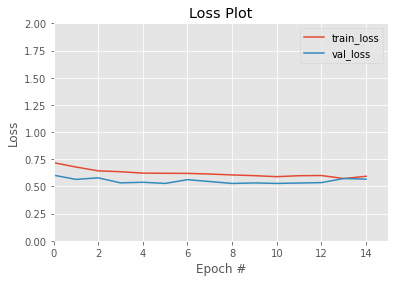

In [ ]:
%matplotlib inline

import matplotlib.pyplot as plt

plt.style.use("ggplot")
plt.figure()
plt.axis([0, 15, 0, 2])
plt.plot(np.arange(0, 15), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, 15), H.history["val_loss"], label="val_loss")
plt.title("Loss Plot")
plt.xlabel("Epoch #")
plt.ylabel("Loss")
plt.legend()
plt.show()

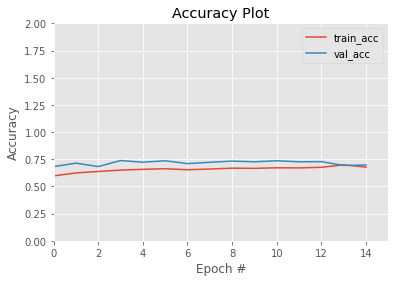

In [ ]:
%matplotlib inline

import matplotlib.pyplot as plt

plt.style.use("ggplot")
plt.figure()
plt.axis([0, 15, 0, 2])
plt.plot(np.arange(0, 15), H.history["acc"], label="train_acc")
plt.plot(np.arange(0, 15), H.history["val_acc"], label="val_acc")
plt.title("Accuracy Plot")
plt.xlabel("Epoch #")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import classification_report

pred = model.predict(x_val)
labels = (pred > 0.5).astype(np.int)

print(classification_report(y_val, labels))

              precision    recall  f1-score   support

           0       0.82      0.51      0.63       500
           1       0.64      0.89      0.75       500

    accuracy                           0.70      1000
   macro avg       0.73      0.70      0.69      1000
weighted avg       0.73      0.70      0.69      1000



<h3>Save & Load Model</h3>

Untuk menyimpan model beserta bobot yang sudah kita definisikan sebelumnya, kita cukup mengetikkan code berikut:

In [ ]:
from tensorflow.keras.models import model_from_json

# Simpan model dalam file Json
model_json = model.to_json()
with open("modelJson.json", "w") as json_file:
    json_file.write(model_json)
# Simpan bobot dalam file HDF5
model.save_weights("modelWeight.h5")
print("Model saved successfully")

print('. . . . .  . . . . . .')

# Load json model
json_file = open('modelJson.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load bobot model
loaded_model.load_weights("modelWeight.h5")
print("Loaded model from disk")
 
# evaluasi loaded json model
loaded_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
score = loaded_model.evaluate(x_val, y_val, verbose=0)
print("%s: %.2f%%" % (loaded_model.metrics_names[1], score[1]*100))

Model saved successfully
. . . . .  . . . . . .
Loaded model from disk
accuracy: 69.70%
